In [1]:
import tensorflow as tf
import numpy as np



In [2]:
tf.reset_default_graph()

In [3]:
data = [[i for i in range(10)] for _ in range(1000)]
normal = np.random.randn(1000,10)## shape
normal

array([[-2.12324175,  0.19511673,  0.18808629, ..., -0.57778961,
        -1.42607435, -1.29761372],
       [-0.7832352 , -0.16110903, -0.54907902, ..., -0.32153587,
        -1.82882713,  0.60468767],
       [ 0.38294473,  1.59180877,  0.85506847, ..., -0.74695387,
        -1.3861841 , -0.67285045],
       ..., 
       [ 0.12594555, -0.97706143,  0.73281464, ..., -0.24376553,
         0.12269282, -0.89966972],
       [-1.95773332, -0.10821254,  0.34094949, ...,  0.38568869,
         1.1022306 ,  0.32902058],
       [-0.96458373, -0.22357297, -0.98197867, ...,  1.15729503,
         1.22963762,  0.52100723]])

In [4]:
def generator(z): ## noise = z 
    name ='generator/layer_{}'
    layer1= tf.layers.dense(z,10, name =name.format(1)) ## dense layer=10 개 
    layer2 =tf.layers.dense(layer1,10, name =name.format(2))
    layer3 =tf.layers.dense(layer2,10, name =name.format(3))
    out =tf.layers.dense(layer3,10, name =name.format('out'))
    return out 

In [5]:
def discriminator(feature, reuse):
    name ='discriminator/layer_{}'
    layer1 = tf.layers.dense(feature, 15, reuse = reuse, name =name.format(1))
    layer2 = tf.layers.dense(layer1, 15, reuse = reuse, name =name.format(2))
    layer3 = tf.layers.dense(layer2, 15, reuse = reuse, name =name.format(3))
    layer4 = tf.layers.dense(layer3, 15, reuse = reuse, name =name.format(4))
    out = tf.layers.dense(layer4, 1, reuse = reuse, name =name.format('out')) ## label은 무조건 1 
    return out 

In [6]:
def gan_loss(logits_real, logits_fake):
    loss_real = tf.losses.sigmoid_cross_entropy(tf.ones_like(logits_real), logits_real)
    loss_fake = tf.losses.sigmoid_cross_entropy(tf.zeros_like(logits_fake), logits_fake)
    discriminator_loss = loss_real + loss_fake
    generator_loss = tf.losses.sigmoid_cross_entropy(tf.ones_like(logits_fake), logits_fake)
    return generator_loss, discriminator_loss

In [7]:
def train(loss, variables):
    optimizer = tf.train.GradientDescentOptimizer(0.01)
    grads = optimizer.compute_gradients(loss, var_list=variables)
    return optimizer.apply_gradients(grads)


In [8]:
real_data = tf.placeholder(tf.float32, shape =[None, 10])
z = tf.placeholder(tf.float32, shape =[None, 10])

In [9]:
fake_data = generator(z)
real_logits = discriminator(real_data,False)
fake_logits = discriminator(fake_data,True)





In [10]:
disc_real_prob = tf.reduce_mean(tf.nn.sigmoid(real_logits))
disc_fake_prob = tf.reduce_mean(tf.nn.sigmoid(fake_logits))

In [11]:
loss_gen, loss_disc = gan_loss(disc_real_prob, disc_fake_prob)


In [12]:
variables = tf.trainable_variables()

gen_variables = [v for v in variables if v.name.startswith('generator')]
disc_variables = [v for v in variables if v.name.startswith('discriminator')]

In [13]:
disc_train_op = train(loss_disc, disc_variables)
gen_train_op = train(loss_gen, gen_variables)


In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _, _real_prob, _fake_prob = sess.run([disc_train_op, disc_real_prob, disc_fake_prob], 
                                             feed_dict={real_data: data, z: normal})
        _, _loss = sess.run([gen_train_op, loss_gen], feed_dict={z: normal})
        
        if i%100 == 0:
            print('step: {}, real prob: {}, fake prob: {}, loss: {}'.format(i, _real_prob, _fake_prob, _loss))
        
    _gen = sess.run(fake_data, feed_dict={z: normal})
    print('generating data')
    for g in _gen[:10]:
        print(g)

step: 0, real prob: 0.09783492982387543, fake prob: 0.49823006987571716, loss: 0.47548866271972656
step: 100, real prob: 0.9986756443977356, fake prob: 0.24226422607898712, loss: 0.5803887248039246
step: 200, real prob: 0.9993143081665039, fake prob: 0.09694339334964752, loss: 0.6462596654891968
step: 300, real prob: 0.9994698762893677, fake prob: 0.04697972163558006, loss: 0.6700814962387085
step: 400, real prob: 0.9995849132537842, fake prob: 0.02764303982257843, loss: 0.679486870765686
step: 500, real prob: 0.9996643662452698, fake prob: 0.018449872732162476, loss: 0.683999240398407
step: 600, real prob: 0.9997252821922302, fake prob: 0.013366756960749626, loss: 0.6865065097808838
step: 700, real prob: 0.9997708797454834, fake prob: 0.01024421863257885, loss: 0.6880512237548828
step: 800, real prob: 0.9998018741607666, fake prob: 0.008175373077392578, loss: 0.6890767812728882
step: 900, real prob: 0.9998311996459961, fake prob: 0.006725169252604246, loss: 0.6897966861724854
generati

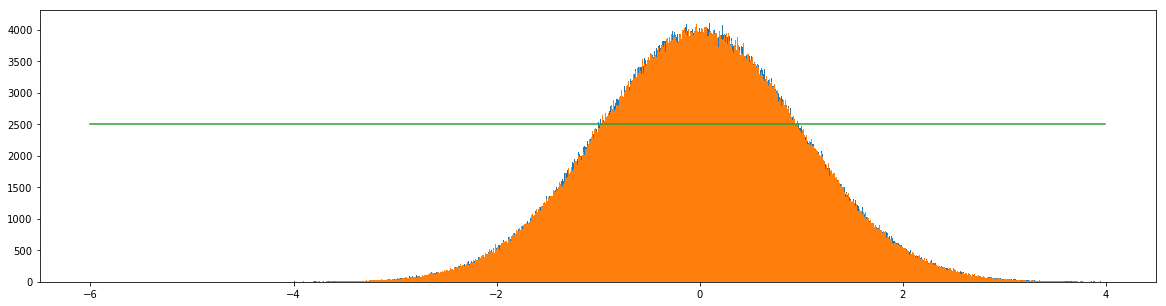

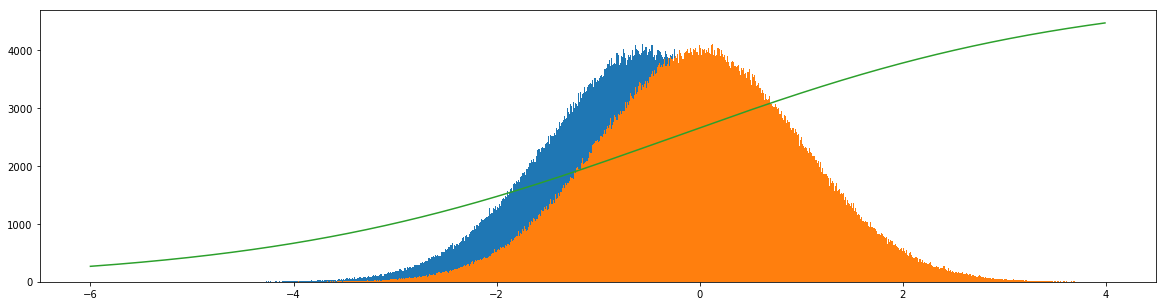

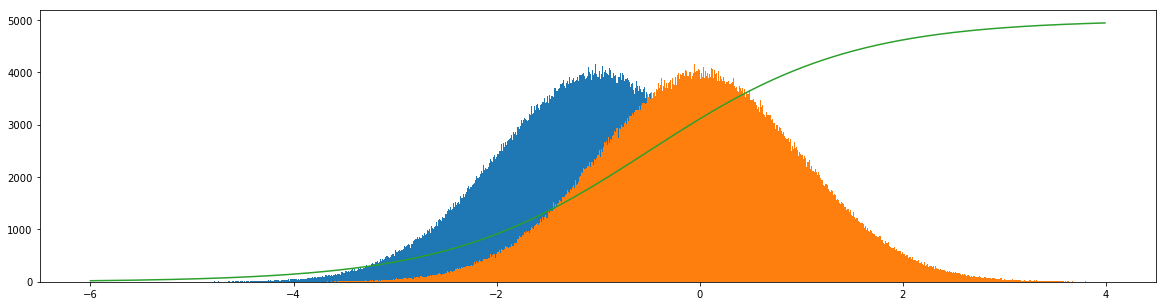

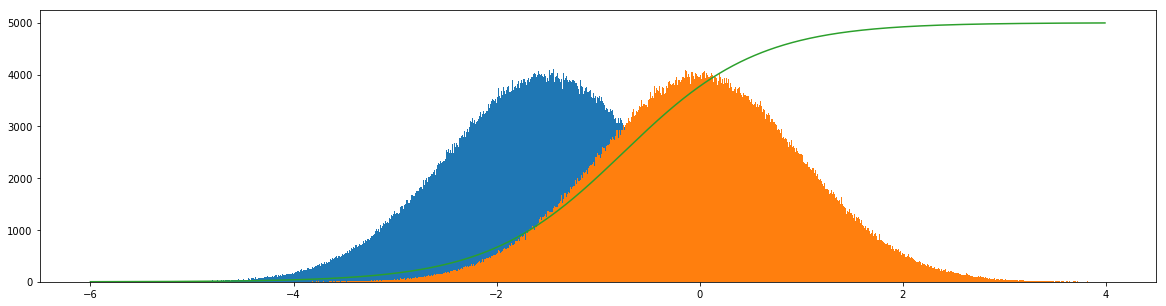

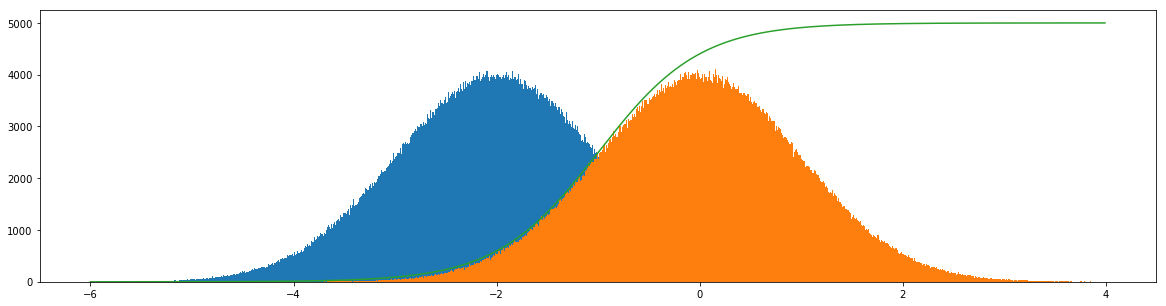

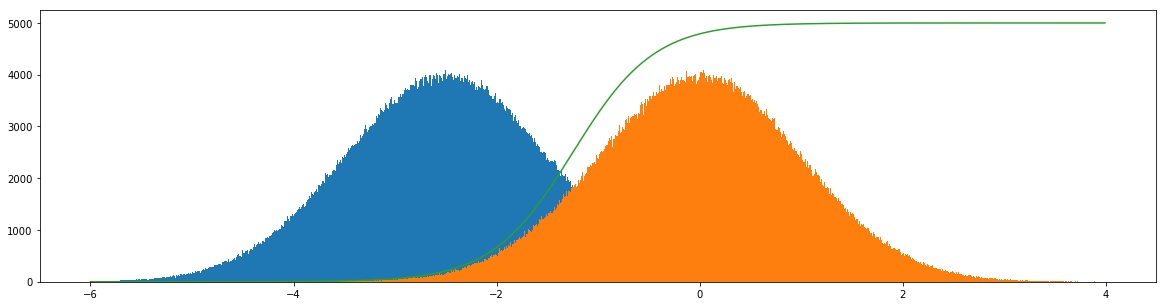

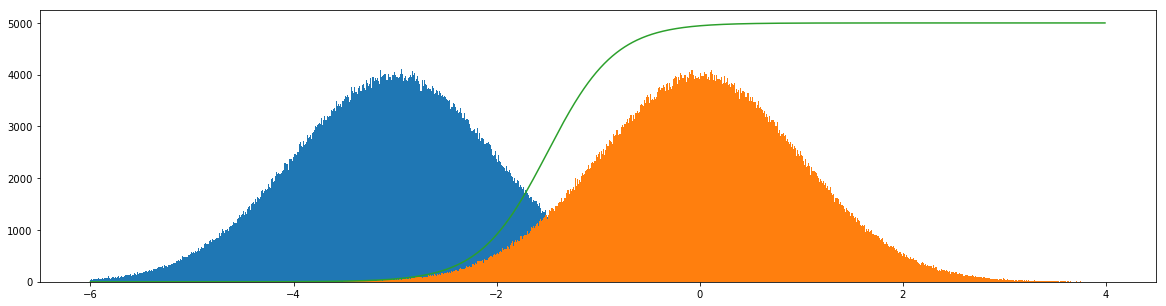

In [15]:
import matplotlib.pyplot as plt
import numpy as np

samples = 1000000
loc = 0.5
for i in range(7):
    dist1 = np.random.normal(loc=-i*loc, size=samples)
    dist2 = np.random.normal(loc=0, size=samples)
    x = np.arange(-6, 4, 0.01)
    
    sig_x = np.arange(-6, 4, 0.01)
    sig = 1.0/(1.+np.exp(-(float(i)*0.5*(sig_x+0.5*loc*float(i)))))*5000
    
    plt.figure(num=i, figsize=[20, 5])
    plt.hist(dist1, bins=x)
    plt.hist(dist2, bins=x)
    plt.plot(sig_x, sig)
    plt.savefig('data/gan{}'.format(i))
    plt.show()